# Домашнее задание по Matplotlib и Seaborn
# Ultra Pro
### *Часть 1. Matplotlib*

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import pandas as pd 
%matplotlib inline

### **Задача 1**

Подгрузите любую картинку любым способом и выведите её на экран. Измените её размер на 480х320, добавьте зеленый прямоугольник в любом месте экрана и выведите результат.


In [ ]:
from google.colab import drive # Подключаем гугл-диск
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Решение:**

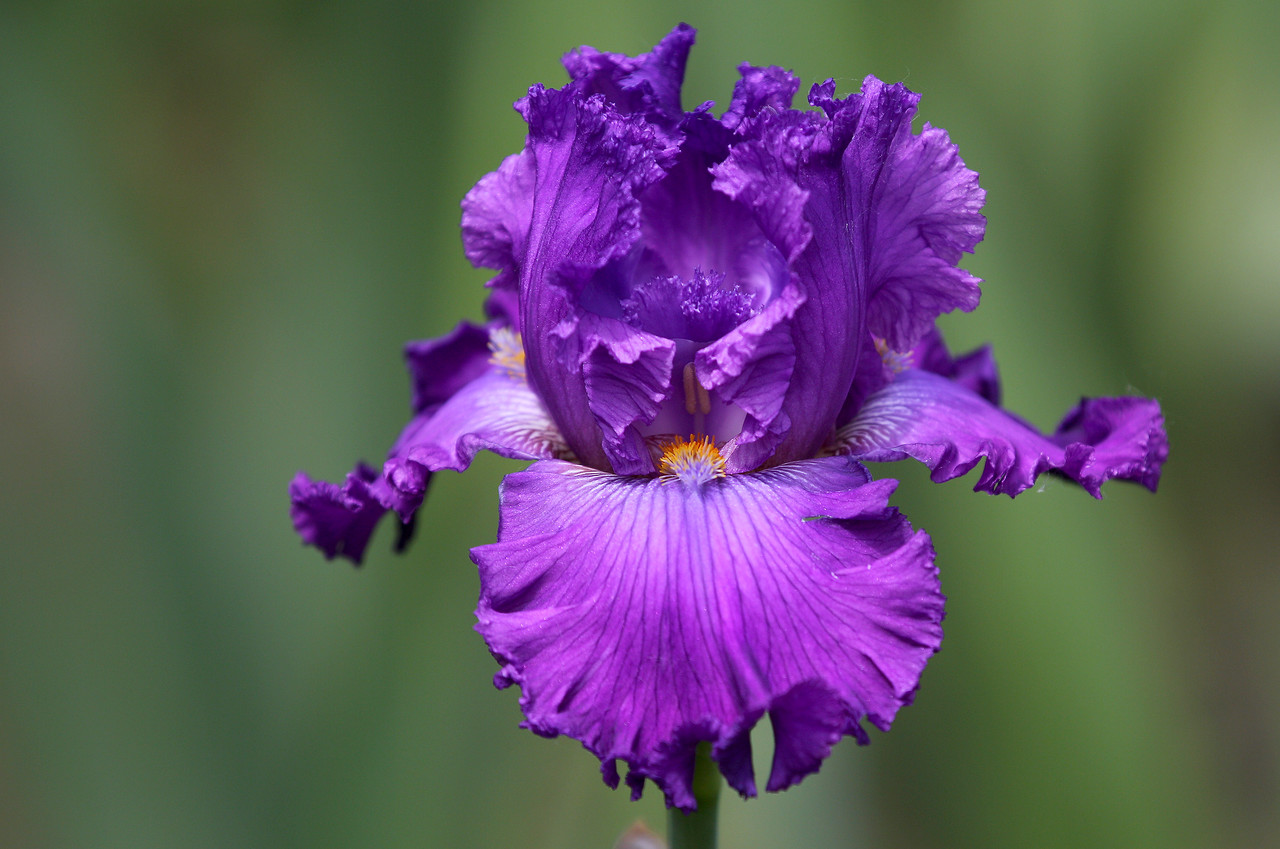

In [ ]:
from PIL import Image, ImageDraw # Модули работы с изображениями

# С помощью метода open открывает изображение и сохраняем ее в переменную image
image = Image.open('/content/drive/MyDrive/NU/05 Matplotlib и Seaborn/Iris.jpg')        

# Выведем картинку на экран (сказано в задании)
image

(480, 320)


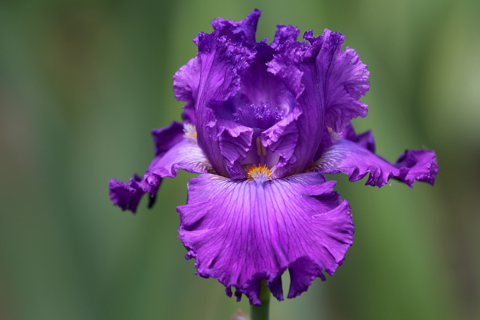

In [ ]:
image = image.resize((480, 320))            # Изменяем размер с помощью метода .resize на 480х320 пикселей
print (image.size)                          # Проверяем размер
image                                       # Результат 

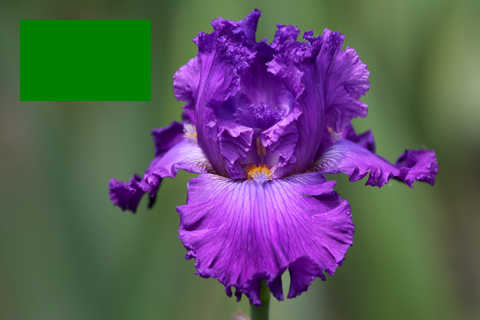

In [ ]:
# Создадим из картинки объект ImageDraw. Чтобы на нем можно нарисовать что-то (например прямоуголник из задания)
image_draw = ImageDraw.Draw(image)

# С помощью метода .rectangle() нарисуем зеленый прямоугольник в левом верхнем углу
image_draw.rectangle((20, 20, 150, 100), fill='Green')

# Посмотрим результат
image

### **Задача 2**

На основе данных, приведенных ниже, постройте парную гистограмму как на рисунке (100% сходство не обязательно).
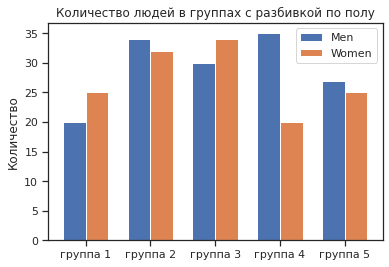


In [ ]:

labels = ['группа 1', 'группа 2', 'группа 3', 'группа 4', 'группа 5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]


### **Решение:**

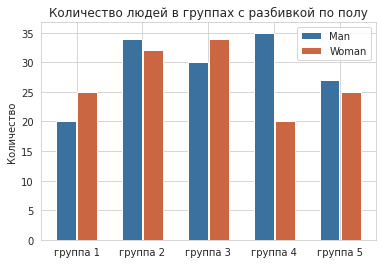

In [ ]:
# Задаем пространство для подграфиков
fig, axes = plt.subplots()

# Создадим массив такого же размера как и входные данные для кол-ва столбцов в графике 
i = np.arange(len(men_means))

# Построим графики, но для того чтобы они не сливались друг с другом сделам им смещение +-. 
# Можно было бы присвоить переменной толщину линии например width = 0.3 И смещение задават i - widht/2.

axes.bar(i - 0.16, men_means, width = 0.3, label = 'Man', color='xkcd:muted blue')         # Так же зададим ширину стержней и лейбл
axes.bar(i + 0.16, women_means, width = 0.3, label = 'Woman', color='xkcd:terracotta')     # Очень долго подбирал нужный цвет (примерно похожий)

# Зададим нужный размер графика, чтобы он соответствовал примеру
fig.set_figwidth(6)    #  ширина Figure
fig.set_figheight(4)    #  высота Figure

# Присвоим оси х имена из переменной labels
plt.xticks(i, labels)

# Присвоим названия графику и подпись оси у
axes.set_ylabel('Количество')                                        # Оси у
axes.set_title('Количество людей в группах с разбивкой по полу')     # Общее название графика

plt.legend()                                                         # Выведем легенгу (Man, woman)
plt.show()

### *Часть 2. Seaborn*

### **Задача 3**

Используя датасет "Ирисы", подгруженный кодом ниже, постройте график всех парных взаимосвязей с разметкой цвета в соответствии с метками классов (столбец species).


In [ ]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### **Решение:**

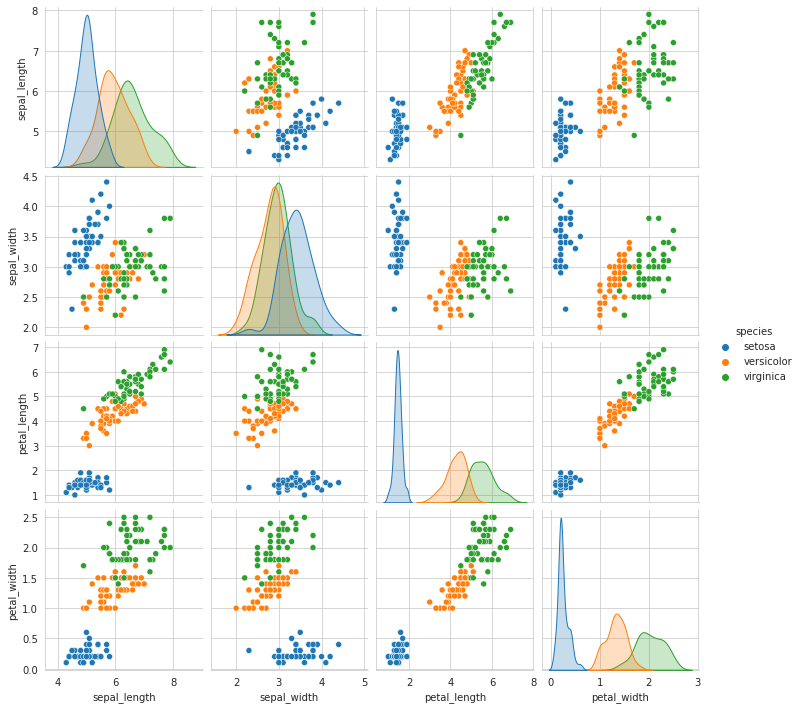

In [ ]:
#  График всех парных взаимосвязей с разметкой цвета в соответствии с метками классов (столбец species)
sns.pairplot(iris, hue='species')
plt.show()

# В чате у куратора спросил, так ли надо было сделать. Ответ утвердительный. 

### **Задача 4**

Используя датасет ниже "flights", посчитайте сумму ежегодных перелетов пассажиров (используя преобразование столбца "year" в столбец временных индексов) и постройте диаграмму, отображающую количество пассажиров за каждый год.

In [ ]:
df = sns.load_dataset("flights")
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


### **Решение:**

In [ ]:
# Преобразуем столбец year в index
df.index = df.year

# Удалим уже не нужный столбец year, чтобы не дублировалась информация
df.drop('year', axis=1, inplace = True)
df.head()

,month,passengers
year,,
1949,Jan,112
1949,Feb,118
1949,Mar,132
1949,Apr,129
1949,May,121


In [ ]:
# Так как нам нужно построить диаграмму по количеству пассажиров за каждый год, то требуется узнать это кол-во.
# Для этого с помощью функции .groupby найдем сумму всех пассажиров за каждый год

df_sum_year = df.groupby([df.index]).sum()
df_sum_year

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


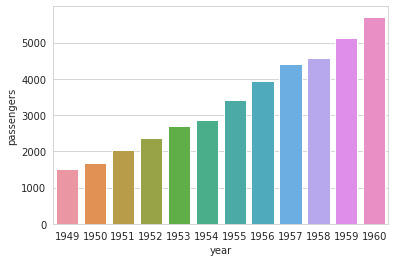

In [ ]:
# Построим диаграмму. По оси 'х' будут года. А по оси 'у' кол-во пассажиров перевезенных за год
sns.barplot(df_sum_year.index , y = df_sum_year.passengers)
plt.show()
# Наглядно видно что со временем кол-во пассажиров растет. 

### **Задача 5**

Используя датасет "flights" из предыдущей задачи, постройте 12 boxplot'ов для каждого месяца на одном графике. Приведите в порядок размер и тики, чтобы график был читаемым.


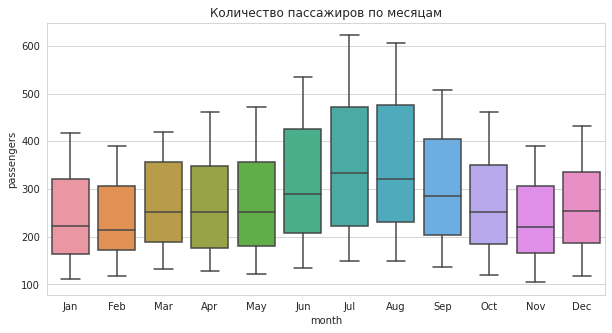

In [ ]:
plt.figure(figsize=(10,5))

sns.set_style('whitegrid')
sns.boxplot(data = df, x = 'month', y ='passengers')
plt.title('Количество пассажиров по месяцам')

plt.show()
# Но в данном случаи непонятно в каждом месяце какое значение соответствует году, поэтому можно улучшить график ниже.

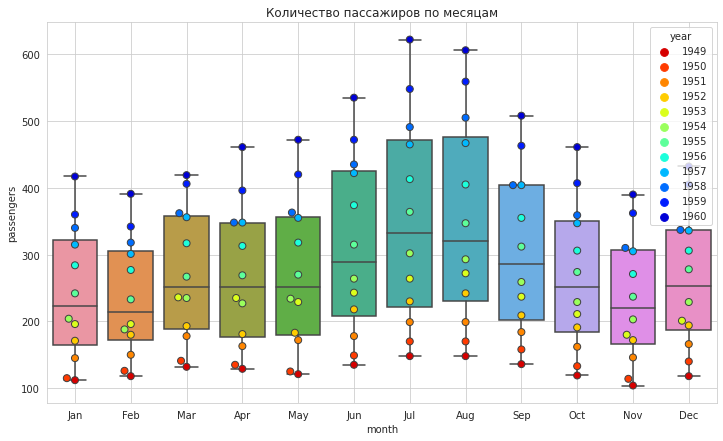

In [ ]:
# Использум функцию swarmplot (), чтобы показать точки данных поверх полей (для лучшей наглядности)
# Так же можно использовать палитру, что бы различать года.
# По графику видно, что с каждым годом пассажиропоток увеличивается. Но сохраняется тенденция, что в летнии месяцы больше. 

plt.figure(figsize=(12,7))

sns.boxplot(data = df, x = 'month', y ='passengers')

sns.swarmplot(data = df, x = 'month', y ='passengers', hue = df.index, palette="jet_r", linewidth = 1, size=7)
plt.title('Количество пассажиров по месяцам')        # Подпись графика
plt.grid(True)                                       # Добавим линий для наглядности
plt.show()

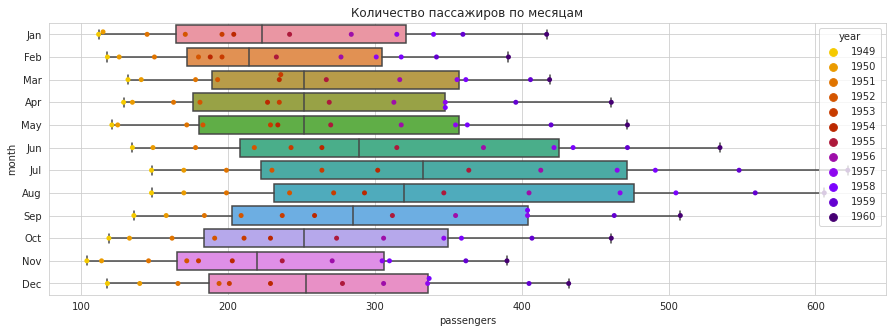

In [ ]:
# А так же можно в горизонтальной плоскости
plt.figure(figsize=(15,5))


sns.boxplot(data = df, y = 'month', x ='passengers')

sns.swarmplot(data = df, y = 'month', x ='passengers', color="r", hue = df.index, palette="gnuplot_r")
plt.title('Количество пассажиров по месяцам')
plt.grid(True) 

plt.show()

       passengers
month            
Jan          2901
Feb          2820
Mar          3242
Apr          3205
May          3262
Jun          3740
Jul          4216
Aug          4213
Sep          3629
Oct          3199
Nov          2794
Dec          3142


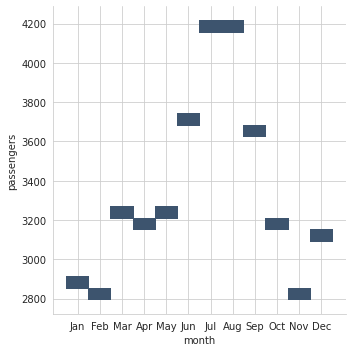

In [ ]:
# Можно еще вывести на графике сумму пассажиров по месяцам.
# И видно, что например в июле и августе было больше всего пссажиров за все годы
# А в феврале и ноябре меньше

df_sum_m = df.groupby(df.month).sum()    # Найдем сумму всех пассажиров по месяцам за все годы.
print (df_sum_m)

sns.displot(data = df_sum_m, x = 'month', y ='passengers', bins = 24)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


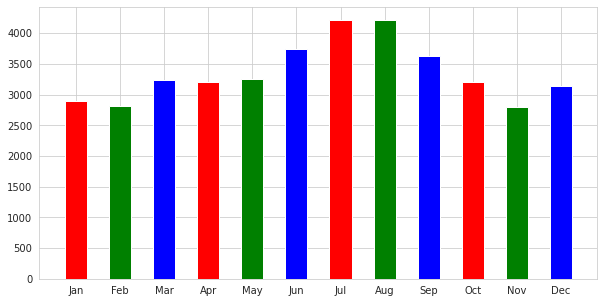

In [ ]:
# Или с помощью диаграммы .bar
plt.figure(figsize=(10,5))
plt.bar(df_sum_m.index, df_sum_m.passengers, color='rgb', align='center', width = 0.5)
plt.show()
# Так же видим общее увеличение пассажирапотока в летние месяцы